<div class="alert alert-block alert-success">
<font size = 30>Classification based on Income data </font>

<div class="alert alert-block alert-info">

### <font color=blue>**CONTENTS**: </font>
<font color=black>
<br>- Reading the data
<br>- Data-Preprocessing
<br>- Model-Building
<br>- Conclusion<br> </font>


In [49]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config Completer.use_jedi = False
%config NotebookApp.iopub_data_rate_limit = 7000000000.0 

In [2]:
import numpy as np
import pandas as pd

0

<div class="alert alert-block alert-success">
  
## Read the data 

In [3]:
income_data = pd.read_csv("train_data.csv")

In [4]:
income_data.head()

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,1,39.0,state,77516.0,Bachelors,13,NaN,0,Never-married,clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,2,50.0,self_employed,83311.0,Bachelors,13,NaN,0,Married-civilian,managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,3,38.0,private,215646.0,HS-grad,9,NaN,0,Divorced,cleaner,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,4,53.0,private,234721.0,11th,7,NaN,0,Married-civilian,cleaner,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,5,28.0,private,338409.0,Bachelors,13,NaN,0,Married-civilian,specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


<div class="alert alert-block alert-info">
* Dimensions of the data

In [5]:
income_data.shape

(31587, 18)

In [6]:
income_data.describe()

,index,age,financial_weight,years_of_education,tax_paid,loan_taken,gain,loss,working_hours,target
count,31587.000000,31585.000000,3.158500e+04,31587.000000,2381.000000,31587.000000,31585.000000,31585.000000,31585.000000,31587.000000
mean,15794.000000,38.560266,1.899756e+05,10.079146,6286.380419,0.050242,1090.173405,87.166566,40.439607,0.241207
std,9118.525813,13.632411,1.057192e+05,2.571846,2033.680490,0.218448,7444.382583,402.863825,12.368394,0.427822
min,1.000000,17.000000,1.228500e+04,1.000000,2010.469174,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7897.500000,28.000000,1.178810e+05,9.000000,5004.099923,0.000000,0.000000,0.000000,40.000000,0.000000
50%,15794.000000,37.000000,1.785640e+05,10.000000,6381.934626,0.000000,0.000000,0.000000,40.000000,0.000000
75%,23690.500000,48.000000,2.374660e+05,12.000000,7967.520312,0.000000,0.000000,0.000000,45.000000,0.000000
max,31587.000000,90.000000,1.484705e+06,16.000000,9997.840369,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
income_data.nunique()

index                 31587
age                      73
working_sector            7
financial_weight      21198
qualification            16
years_of_education       16
tax_paid               1968
loan_taken                2
marital_status            7
occupation               14
relationship              6
ethnicity                 5
gender                    2
gain                    119
loss                     92
working_hours            94
country                  41
target                    2
dtype: int64

In [8]:
income_data.dtypes

index                   int64
age                   float64
working_sector         object
financial_weight      float64
qualification          object
years_of_education      int64
tax_paid              float64
loan_taken              int64
marital_status         object
occupation             object
relationship           object
ethnicity              object
gender                 object
gain                  float64
loss                  float64
working_hours         float64
country                object
target                  int64
dtype: object

<div class="alert alert-block alert-info">
* Converting the datatype of target and loan_taken into category 

In [10]:
income_data['target'] = income_data['target'].astype('category')
# income_data['occupation'] = income_data['occupation'].astype('category')
income_data['loan_taken'] = income_data['loan_taken'].astype('category')

<div class="alert alert-block alert-info">
* Check for Null values in the entire feature-set

In [11]:
income_data.isnull().sum()

index                     0
age                       2
working_sector         1775
financial_weight          2
qualification             2
years_of_education        0
tax_paid              29206
loan_taken                0
marital_status            0
occupation             1782
relationship              2
ethnicity                 2
gender                    2
gain                      2
loss                      2
working_hours             2
country                 568
target                    0
dtype: int64

<div class="alert alert-block alert-info">
* qualification and years_of_education appear to be same thing, so dropping the qualification coloumn

In [31]:
income_data.drop('qualification',axis=1,inplace=True)

<div class="alert alert-block alert-warning">
#### We see that tax_paid, working_sector, occupation, country have more number of NA's so focussing on these features first

<div class="alert alert-block alert-info">
* Calculating percentage of null values in the columns

In [12]:
col_list = ['tax_paid','occupation','working_sector','country']
percentage = 0.0
for i in col_list:
    percentage = (income_data[i].isnull().sum() / len(income_data[i]) *100)
    print("Percentage of null values in " ,i,":" , percentage)
    

Percentage of null values in  tax_paid : 92.46208883401398
Percentage of null values in  occupation : 5.64156140184253
Percentage of null values in  working_sector : 5.619400386234844
Percentage of null values in  country : 1.79820812359515


<div class="alert alert-block alert-success">
####  Imputing missing values

In [13]:
#Imputing all the NA values in tax-paid column as 0
income_data.tax_paid.fillna(0, inplace=True)

#Imputing all the NA's in country column as 'others'
income_data.country.fillna("Others", inplace=True)
income_data_copy = income_data


In [14]:
income_data.isnull().sum()

index                    0
age                      2
working_sector        1775
financial_weight         2
qualification            2
years_of_education       0
tax_paid                 0
loan_taken               0
marital_status           0
occupation            1782
relationship             2
ethnicity                2
gender                   2
gain                     2
loss                     2
working_hours            2
country                  0
target                   0
dtype: int64

In [15]:
income_data.occupation.unique()
income_data.occupation.mode()

0    specialty
dtype: object

In [16]:
income_data.occupation.fillna('specialty', inplace=True)

In [17]:
income_data.dropna(subset=['working_sector'], inplace=True)

In [18]:
income_data['occupation'].isnull().sum()

0

In [21]:
income_data[income_data.isna().any(axis=1)].shape

(0, 18)

In [23]:
income_data.isnull().sum()

index                 0
age                   0
working_sector        0
financial_weight      0
qualification         0
years_of_education    0
tax_paid              0
loan_taken            0
marital_status        0
occupation            0
relationship          0
ethnicity             0
gender                0
gain                  0
loss                  0
working_hours         0
country               0
target                0
dtype: int64

In [46]:
income_data.shape

(29812, 17)

<div class="alert alert-block alert-success">

## Visualization of class distribution

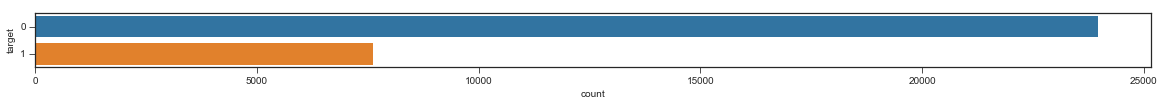

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="target", data=income_data)

<div class="alert alert-block alert-success">
### Encoding the categorical features into numerical values

In [25]:
from sklearn import preprocessing

In [26]:
encoder = preprocessing.LabelEncoder()

In [27]:
income_data.dtypes

index                    int64
age                    float64
working_sector          object
financial_weight       float64
qualification           object
years_of_education       int64
tax_paid               float64
loan_taken            category
marital_status          object
occupation              object
relationship            object
ethnicity               object
gender                  object
gain                   float64
loss                   float64
working_hours          float64
country                 object
target                category
dtype: object

In [28]:
income_data.working_sector = encoder.fit_transform(income_data.working_sector)

In [29]:
income_data.marital_status = encoder.fit_transform(income_data.marital_status)

In [30]:
income_data.occupation = encoder.fit_transform(income_data.occupation)
income_data.relationship = encoder.fit_transform(income_data.relationship)
income_data.ethnicity = encoder.fit_transform(income_data.ethnicity)
income_data.gender = encoder.fit_transform(income_data.gender)
income_data.country = encoder.fit_transform(income_data.country)

In [32]:
income_data.head()

,index,age,working_sector,financial_weight,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,1,39.0,5,77516.0,13,0.0,0,4,1,1,4,1,2174.0,0.0,40.0,38,0
1,2,50.0,4,83311.0,13,0.0,0,1,7,0,4,1,0.0,0.0,13.0,38,0
2,3,38.0,3,215646.0,9,0.0,0,0,0,1,4,1,0.0,0.0,40.0,38,0
3,4,53.0,3,234721.0,7,0.0,0,1,0,0,2,1,0.0,0.0,40.0,38,0
4,5,28.0,3,338409.0,13,0.0,0,1,11,5,2,0,0.0,0.0,40.0,4,0


<div class="alert alert-block alert-success">
### Splitting the data into train and test

In [33]:
from sklearn.model_selection import train_test_split
X = income_data.drop('target', axis=1)
Y = income_data.target

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

<div class="alert alert-block alert-info">
* Standardizing the train data and applying the same transformation to both the train and test data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sd = StandardScaler()

In [37]:
sd.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_train = sd.transform(X_train)
X_test = sd.transform(X_test)

<div class="alert alert-block alert-success">
## Building Models

<div class="alert alert-block alert-info">
##### Gaussian Naive bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, classification_report

model_gnb = GaussianNB()
model_gnb.fit(X_train, Y_train)
Y_pred_gnb = model_gnb.predict(X_test)

In [40]:
accuracy_score(Y_pred_gnb,Y_test)

0.8015429338103757

<div class="alert alert-block alert-info">
##### SVM

In [41]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [42]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, Y_train)
Y_svm_pred = svm_clf.predict(X_test)
accuracy_score(Y_svm_pred, Y_test)

0.8410107334525939

<div class="alert alert-block alert-info">
##### Logistic Regression

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()

logistic_clf.fit(X_train, Y_train)

Y_lgr_pred= logistic_clf.predict(X_test)

accuracy_score(Y_lgr_pred,Y_test)


0.8224508050089445

<div class="alert alert-block alert-info">
##### Random Forest

In [44]:
RandomF_clf = RandomForestClassifier(n_estimators=50, random_state=0)

RandomF_clf.fit(X_train,Y_train)

Y_rf_pred = RandomF_clf.predict(X_test)

accuracy_score(Y_rf_pred,Y_test)

0.8496198568872988

<div class="alert alert-block alert-info">
* Trying with different values of n_estimators 

In [51]:
RandomF_clf = RandomForestClassifier(n_estimators=130, random_state=0)

RandomF_clf.fit(X_train,Y_train)

Y_rf_pred = RandomF_clf.predict(X_test)

accuracy_score(Y_rf_pred,Y_test)

0.8530858676207513

<div class="alert alert-block alert-success">
* We can observe that accuracy improved by changing the value of n_estimator, so we can tune the model later.

<div class="alert alert-block alert-warning">
### Tuning the SVM model using Gridsearch

In [54]:
params = {'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}],
          'C': [0.1,1, 10],
          'gamma': [0.001, 0.01, 0.1],
          'kernel':['linear','rbf'] }

svm_grid_clf = GridSearchCV(estimator=svm.SVC(cache_size=100000), param_grid= params, n_jobs=-1,verbose=45)

svm_grid_clf.fit(X_train,Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear ....
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear ....
[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8201552616446234, total=   8.2s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear ....
[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.822049734080782, total=   8.4s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf .......


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.0s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8182602444284687, total=   7.3s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf .......


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   20.5s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.7540606583297398, total=  12.0s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf .......


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.4s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.7530189764232318, total=  12.0s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear .....


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   38.5s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.7528396836808052, total=  11.1s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear .....


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   46.6s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.822049734080782, total=   7.2s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear .....


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   48.1s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8201552616446234, total=   8.0s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   57.2s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8182602444284687, total=   8.0s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   58.6s


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.8119879258300992, total=  11.3s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.8096607245543416, total=  11.0s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.3min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.822049734080782, total=   7.5s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.4min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.809489575844716, total=  11.5s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.5min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8201552616446234, total=   7.4s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.6min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8182602444284687, total=   7.4s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1.7min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8226246945522495, total=  11.4s
[CV] C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8241805635422657, total=  11.3s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear ....


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min


[CV]  C=0.1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.813803019410496, total=  11.3s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear ....


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.2min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.8118441857122323, total=   9.4s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear ....


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:  2.2min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.8139735480161012, total=  10.3s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf .......
[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.7976994967649174, total=   9.8s


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.4min


[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf .......
[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.8047728579643473, total=  18.6s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf .......
[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.8111254851228978, total=  18.9s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  2.8min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.8118441857122323, total=   9.5s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.0min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.8139735480161012, total=   9.1s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.793961179007908, total=  17.6s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.3min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.7976994967649174, total=   8.8s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  3.4min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8180250107805088, total=  14.9s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.6min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8128234617596319, total=  15.0s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  3.8min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8005751258087707, total=  14.1s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  4.0min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.8118441857122323, total=   9.4s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:  4.0min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.8139735480161012, total=  10.2s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  4.2min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.7976994967649174, total=   9.8s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.8234871352594509, total=  14.5s
[CV] C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.5min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.8225991949396205, total=  14.3s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:  4.6min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8223372143165157, total=  12.8s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:  4.8min


[CV]  C=0.1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.813371675053918, total=  14.4s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.9min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8210178263369753, total=  12.2s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  5.0min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8191229331416248, total=  12.7s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:  5.1min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.8099755641799626, total=  11.1s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  5.3min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.8080793559516963, total=  10.8s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  5.4min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.809058231488138, total=  11.4s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.6min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8223372143165157, total=  12.6s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:  5.7min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8210178263369753, total=  12.9s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  5.9min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8191229331416248, total=  13.2s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  5.9min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.8375736668104068, total=  10.0s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.1min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.8394192064404831, total=  10.0s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear ........


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:  6.2min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.8280373831775701, total=   9.7s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear ........


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  6.4min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8223372143165157, total=  12.6s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear ........


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:  6.4min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8210178263369753, total=  12.7s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf ...........


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  6.6min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8191229331416248, total=  13.2s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf ...........


[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:  6.7min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8390110679890758, total=  11.4s
[CV] C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf ...........


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  6.9min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8441633122484187, total=  11.5s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.0min


[CV]  C=1, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8350826743350108, total=  11.0s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:  7.2min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.8119879258300992, total=  15.9s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:  7.3min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.8142610695802185, total=  16.2s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.5min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.79784327821711, total=  15.9s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  7.6min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.813569067126635, total=  15.0s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  7.9min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.8095169637722829, total=  15.3s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:  8.0min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.7955427749820273, total=  14.6s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:  8.2min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.8119879258300992, total=  16.9s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  8.3min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.8142610695802185, total=  17.2s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  8.5min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.79784327821711, total=  16.8s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:  8.6min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8277993387954579, total=  12.1s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.8min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8228867165037378, total=  12.2s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear ........


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  8.9min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.81941049604601, total=  11.9s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear ........


[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  9.1min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.8119879258300992, total=  15.8s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear ........


[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:  9.2min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.8142610695802185, total=  17.0s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf ...........


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  9.5min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.79784327821711, total=  16.1s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf ...........


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  9.5min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.8227684346701164, total=  13.3s
[CV] C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf ...........


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:  9.8min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.8197239792984474, total=  13.4s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:  9.9min


[CV]  C=1, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.81509705248023, total=  12.9s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed: 10.1min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8224809544343826, total=  42.5s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed: 10.6min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8210178263369753, total=  40.0s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 10.8min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.8270806382061233, total=  10.7s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed: 11.1min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=linear, score=0.8191229331416248, total=  36.4s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed: 11.3min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.827774583093732, total=  10.9s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 11.3min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.001, kernel=rbf, score=0.8207045291157441, total=  10.3s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed: 11.5min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8224809544343826, total=  42.6s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed: 12.1min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8210178263369753, total=  40.0s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed: 12.2min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.8417421302285468, total=  11.0s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 12.5min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=linear, score=0.8191229331416248, total=  37.0s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 12.7min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.84401955146636, total=  11.3s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed: 12.8min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.01, kernel=rbf, score=0.8310567936736161, total=  10.5s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed: 13.0min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8224809544343826, total=  43.3s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear .......


[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed: 13.5min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8210178263369753, total=  41.1s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed: 13.7min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8361362656317378, total=  15.3s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed: 14.1min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=linear, score=0.8191229331416248, total=  36.5s
[CV] C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed: 14.2min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8330937320299022, total=  14.8s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 14.4min


[CV]  C=10, class_weight={0: 1, 1: 1}, gamma=0.1, kernel=rbf, score=0.8242990654205608, total=  14.2s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 14.5min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.8117004455943654, total=  55.4s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear .....


[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed: 15.4min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.8142610695802185, total=  54.4s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed: 15.4min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.8198936323127785, total=  13.9s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed: 15.8min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.8205865439907993, total=  14.0s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf ........


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 16.1min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=linear, score=0.7979870596693026, total=  51.2s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed: 16.3min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.001, kernel=rbf, score=0.8070452911574407, total=  12.5s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 16.4min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.8117004455943654, total=  56.4s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear ......


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 17.2min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.8142610695802185, total=  54.0s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed: 17.4min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8265056777346558, total=  13.5s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed: 17.7min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8238930419781484, total=  13.7s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf .........


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed: 18.0min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=linear, score=0.7979870596693026, total=  52.5s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear .......


[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed: 18.2min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.01, kernel=rbf, score=0.8132278936017254, total=  13.0s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear .......


[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed: 18.3min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.8117004455943654, total=  56.6s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear .......


[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed: 19.2min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.8142610695802185, total=  54.2s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 19.3min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.8124191461836999, total=  17.2s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf ..........


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 19.6min


[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.8133985048878666, total=  17.3s
[CV] C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf ..........
[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=linear, score=0.7979870596693026, total=  52.1s
[CV]  C=10, class_weight={0: 1, 1: 2}, gamma=0.1, kernel=rbf, score=0.8080517613227893, total=  11.6s


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 20.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 20.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=100000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}], 'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=45)

In [57]:
svm_grid_clf.best_params_

{'C': 1, 'class_weight': {0: 1, 1: 1}, 'gamma': 0.1, 'kernel': 'rbf'}

In [58]:
svm_grid_clf.best_score_

0.8394192064404831

<div class="alert alert-block alert-info">
* As we can observe that even after tuning model with best hyperparameters the accuracy does not improve. It is due to the fact that we might have to iterate over a large set of hyperparameters to find the best accuracy, while base SVM model provided a better accuracy. This also depends on the kind of data we have. 

* However it is a best practice to tune the model  

<div class="alert alert-block alert-success">
* We found best C, gamma and kernel value from the tuning before, we can use coarse grid to further tune the model for a known range of C, gamma. This is a good practice to focus on a short range of value

In [69]:
params = {'C': np.linspace(1,10,4).tolist(),
          'gamma':  np.linspace(0.1,1,4).tolist(),
          'kernel':['rbf'] }

svm_grid_clf_2 = GridSearchCV(estimator=svm.SVC(cache_size=100000), param_grid= params, n_jobs=-1,verbose=45,cv=5)

svm_grid_clf_2.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV]  C=1.0, gamma=0.1, kernel=rbf, score=0.8322951605174892, total=  16.1s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.7s


[CV]  C=1.0, gamma=0.1, kernel=rbf, score=0.8488260661236224, total=  16.2s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.9s


[CV]  C=1.0, gamma=0.1, kernel=rbf, score=0.8442740776233828, total=  15.2s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV]  C=1.0, gamma=0.1, kernel=rbf, score=0.8346513299784328, total=  15.1s
[CV] C=1.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   46.6s


[CV]  C=1.0, gamma=0.1, kernel=rbf, score=0.8365684160076683, total=  14.4s
[CV] C=1.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min


[CV]  C=1.0, gamma=0.4, kernel=rbf, score=0.8344513655965501, total=  23.3s
[CV] C=1.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.3min


[CV]  C=1.0, gamma=0.4, kernel=rbf, score=0.8155246765692381, total=  23.2s
[CV] C=1.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.7min


[CV]  C=1.0, gamma=0.4, kernel=rbf, score=0.8320555821753713, total=  23.0s
[CV] C=1.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.9min


[CV]  C=1.0, gamma=0.4, kernel=rbf, score=0.8183560987299305, total=  22.6s
[CV] C=1.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.3min


[CV]  C=1.0, gamma=0.4, kernel=rbf, score=0.8277018931224539, total=  22.4s
[CV] C=1.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.5min


[CV]  C=1.0, gamma=0.7, kernel=rbf, score=0.8150455198850024, total=  27.4s
[CV] C=1.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.9min


[CV]  C=1.0, gamma=0.7, kernel=rbf, score=0.8040249161475802, total=  27.1s
[CV] C=1.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.1min


[CV]  C=1.0, gamma=0.7, kernel=rbf, score=0.8191183517010062, total=  26.3s
[CV] C=1.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.6min


[CV]  C=1.0, gamma=0.7, kernel=rbf, score=0.8085310328300982, total=  27.2s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.8min


[CV]  C=1.0, gamma=0.7, kernel=rbf, score=0.8082913970764438, total=  26.4s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  4.3min


[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.8018687110685194, total=  35.7s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.7min


[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.7946813608049832, total=  34.3s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.1min


[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.8073790129372305, total=  31.8s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.4min


[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.7955907021327582, total=  31.5s
[CV] C=4.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:  5.9min


[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.7967888809010304, total=  33.2s
[CV] C=4.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  6.2min


[CV]  C=4.0, gamma=0.1, kernel=rbf, score=0.845951126018208, total=  16.6s
[CV] C=4.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.3min


[CV]  C=4.0, gamma=0.1, kernel=rbf, score=0.830857690464782, total=  18.0s
[CV] C=4.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:  6.7min


[CV]  C=4.0, gamma=0.1, kernel=rbf, score=0.844034499281265, total=  18.1s
[CV] C=4.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  6.7min


[CV]  C=4.0, gamma=0.1, kernel=rbf, score=0.8310567936736161, total=  18.0s
[CV] C=4.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.1min


[CV]  C=4.0, gamma=0.1, kernel=rbf, score=0.8372873232686316, total=  17.6s
[CV] C=4.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.1min


[CV]  C=4.0, gamma=0.4, kernel=rbf, score=0.8200766650694777, total=  26.9s
[CV] C=4.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.7min


[CV]  C=4.0, gamma=0.4, kernel=rbf, score=0.808337326305702, total=  26.3s
[CV] C=4.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  7.7min


[CV]  C=4.0, gamma=0.4, kernel=rbf, score=0.8188787733588884, total=  26.2s
[CV] C=4.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.3min


[CV]  C=4.0, gamma=0.4, kernel=rbf, score=0.8145219266714594, total=  26.3s
[CV] C=4.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  8.3min


[CV]  C=4.0, gamma=0.4, kernel=rbf, score=0.8147615624251138, total=  25.5s
[CV] C=4.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  8.9min


[CV]  C=4.0, gamma=0.7, kernel=rbf, score=0.806420699568759, total=  39.2s
[CV] C=4.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:  9.2min


[CV]  C=4.0, gamma=0.7, kernel=rbf, score=0.7934834690943938, total=  37.8s
[CV] C=4.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  9.8min


[CV]  C=4.0, gamma=0.7, kernel=rbf, score=0.8066602779108769, total=  35.4s
[CV] C=4.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.0min


[CV]  C=4.0, gamma=0.7, kernel=rbf, score=0.8066139468008627, total=  38.7s
[CV] C=4.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.6min


[CV]  C=4.0, gamma=0.7, kernel=rbf, score=0.8025401389887371, total=  42.9s
[CV] C=4.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed: 10.9min


[CV]  C=4.0, gamma=1.0, kernel=rbf, score=0.798993770963105, total=  37.7s
[CV] C=4.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed: 11.5min


[CV]  C=4.0, gamma=1.0, kernel=rbf, score=0.7877335888835649, total=  41.5s
[CV] C=4.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.9min


[CV]  C=4.0, gamma=1.0, kernel=rbf, score=0.7944417824628653, total=  39.7s
[CV] C=4.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 12.4min


[CV]  C=4.0, gamma=1.0, kernel=rbf, score=0.7977474239156482, total=  36.5s
[CV] C=7.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed: 12.7min


[CV]  C=7.0, gamma=0.1, kernel=rbf, score=0.8452323909918543, total=  18.9s
[CV] C=7.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 13.2min


[CV]  C=4.0, gamma=1.0, kernel=rbf, score=0.7927150730889049, total=  39.4s
[CV] C=7.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed: 13.3min


[CV]  C=7.0, gamma=0.1, kernel=rbf, score=0.8279827503593675, total=  18.2s
[CV] C=7.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.6min


[CV]  C=7.0, gamma=0.1, kernel=rbf, score=0.8406804024916148, total=  19.0s
[CV] C=7.0, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed: 13.7min


[CV]  C=7.0, gamma=0.1, kernel=rbf, score=0.8286604361370716, total=  18.5s
[CV] C=7.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 14.0min


[CV]  C=7.0, gamma=0.1, kernel=rbf, score=0.8332135154565061, total=  18.2s
[CV] C=7.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 14.2min


[CV]  C=7.0, gamma=0.4, kernel=rbf, score=0.8157642549113561, total=  26.6s
[CV] C=7.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.6min


[CV]  C=7.0, gamma=0.4, kernel=rbf, score=0.8033061811212266, total=  26.6s
[CV] C=7.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed: 14.8min


[CV]  C=7.0, gamma=0.4, kernel=rbf, score=0.8150455198850024, total=  27.1s
[CV] C=7.0, gamma=0.4, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 15.3min


[CV]  C=7.0, gamma=0.4, kernel=rbf, score=0.8092499400910615, total=  27.8s
[CV] C=7.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed: 15.4min


[CV]  C=7.0, gamma=0.4, kernel=rbf, score=0.811646297627606, total=  26.5s
[CV] C=7.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed: 15.9min


[CV]  C=7.0, gamma=0.7, kernel=rbf, score=0.8018687110685194, total=  38.4s
[CV] C=7.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed: 16.3min


[CV]  C=7.0, gamma=0.7, kernel=rbf, score=0.7898897939626258, total=  38.8s
[CV] C=7.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed: 16.7min


[CV]  C=7.0, gamma=0.7, kernel=rbf, score=0.8009103977000479, total=  36.5s
[CV] C=7.0, gamma=0.7, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 17.1min


[CV]  C=7.0, gamma=0.7, kernel=rbf, score=0.8042175892643182, total=  40.4s
[CV] C=7.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed: 17.6min


[CV]  C=7.0, gamma=0.7, kernel=rbf, score=0.7984663311766116, total=  39.3s
[CV] C=7.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed: 18.0min


[CV]  C=7.0, gamma=1.0, kernel=rbf, score=0.7915668423574509, total=  40.5s
[CV] C=7.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 18.5min


[CV]  C=7.0, gamma=1.0, kernel=rbf, score=0.7829420220412074, total=  38.3s
[CV] C=7.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 18.8min


[CV]  C=7.0, gamma=1.0, kernel=rbf, score=0.7918064206995687, total=  37.7s
[CV] C=7.0, gamma=1.0, kernel=rbf ....................................


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed: 19.4min


[CV]  C=7.0, gamma=1.0, kernel=rbf, score=0.7936736161035226, total=  37.6s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed: 19.7min


[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.844034499281265, total=  19.9s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed: 20.2min


[CV]  C=7.0, gamma=1.0, kernel=rbf, score=0.7867241792475438, total=  33.7s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 20.2min


[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.827024436990896, total=  20.3s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed: 20.6min


[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.8390033540967896, total=  20.8s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed: 20.7min


[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.8286604361370716, total=  20.3s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 21.1min


[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.8324946081955428, total=  19.9s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 21.1min


[CV]  C=10.0, gamma=0.4, kernel=rbf, score=0.8119310014374701, total=  28.4s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 21.7min


[CV]  C=10.0, gamma=0.4, kernel=rbf, score=0.7975563009103978, total=  28.5s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed: 21.8min


[CV]  C=10.0, gamma=0.4, kernel=rbf, score=0.8114518447532343, total=  28.3s
[CV] C=10.0, gamma=0.4, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 22.4min


[CV]  C=10.0, gamma=0.4, kernel=rbf, score=0.8058950395398994, total=  28.3s
[CV] C=10.0, gamma=0.7, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 22.4min


[CV]  C=10.0, gamma=0.4, kernel=rbf, score=0.8085310328300982, total=  27.5s
[CV] C=10.0, gamma=0.7, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed: 23.0min


[CV]  C=10.0, gamma=0.7, kernel=rbf, score=0.798754192620987, total=  39.8s
[CV] C=10.0, gamma=0.7, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed: 23.3min


[CV]  C=10.0, gamma=0.7, kernel=rbf, score=0.7882127455678006, total=  41.9s
[CV] C=10.0, gamma=0.7, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed: 23.9min


[CV]  C=10.0, gamma=0.7, kernel=rbf, score=0.7997125059894585, total=  40.0s
[CV] C=10.0, gamma=0.7, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed: 24.1min


[CV]  C=10.0, gamma=0.7, kernel=rbf, score=0.8025401389887371, total=  39.5s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 24.8min


[CV]  C=10.0, gamma=0.7, kernel=rbf, score=0.7975077881619937, total=  40.5s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed: 25.0min


[CV]  C=10.0, gamma=1.0, kernel=rbf, score=0.78941063727839, total=  40.9s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed: 25.7min


[CV]  C=10.0, gamma=1.0, kernel=rbf, score=0.7791087685673215, total=  39.2s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 25.9min


[CV]  C=10.0, gamma=1.0, kernel=rbf, score=0.7903689506468615, total=  34.5s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV]  C=10.0, gamma=1.0, kernel=rbf, score=0.790079079798706, total=  42.2s
[CV]  C=10.0, gamma=1.0, kernel=rbf, score=0.7860052719865804, total=  33.4s


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 27.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=100000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1.0, 4.0, 7.0, 10.0], 'gamma': [0.1, 0.4, 0.7, 1.0], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=45)

In [72]:
svm_grid_clf_2.best_params_

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [73]:
svm_grid_clf_2.best_score_

0.8393233659191106

<div class="alert alert-block alert-warning">
* After Gridsearch with coarse grid the best values for hyperparameters are same as Gridsearch without coarse grid. This tells us for all chosen values of hyperparameters, the resulted value of C and gamma are correct.

<div class="alert alert-block alert-success">
### Tuning the Randomforest model using Gridsearch

In [56]:
params = {'n_estimators': np.arange(50,160,11).tolist(),
           }
rf_clf = RandomForestClassifier()
rf_grid_clf = GridSearchCV(estimator=rf_clf, param_grid= params, n_jobs=-1,cv=5)
rf_grid_clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 61, 72, 83, 94, 105, 116, 127, 138, 149]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
rf_grid_clf.best_params_

{'n_estimators': 138}

In [60]:
rf_grid_clf.best_score_

0.8585873107149703

<div class="alert alert-block alert-info">
* As we can observer best n_estimator comes out to be 138 and accuracy shoots up to 85.85%

<div class="alert alert-block alert-success">
### Model building using K fold cross validation on the base models that we built before

In [45]:
from sklearn.model_selection import cross_val_score

print("Random Forest")
rf_cv_clf = RandomForestClassifier()
print(cross_val_score(rf_cv_clf,X_train, Y_train, scoring='accuracy', cv = 10))
print("Accuracy", cross_val_score(rf_cv_clf,X_train, Y_train, scoring='accuracy', cv = 10).max()*100)

print("Logistic Regression")
lg_cv_clf = LogisticRegression()
print(cross_val_score(lg_cv_clf,X_train, Y_train, scoring='accuracy', cv = 10))
print("Accuracy", cross_val_score(lg_cv_clf,X_train, Y_train, scoring='accuracy', cv = 10).max()*100)

print("SVM")
sv_cv_clf = svm.SVC()
print(cross_val_score(sv_cv_clf,X_train, Y_train, scoring='accuracy', cv = 10))
print("Accuracy", cross_val_score(sv_cv_clf,X_train, Y_train, scoring='accuracy', cv = 10).max()*100)

Random Forest
[0.84762817 0.83133685 0.84810733 0.8461907  0.84044082 0.84906564
 0.84475323 0.84810733 0.85282838 0.85474593]
Accuracy 85.76904647819838
Logistic Regression
[0.81887877 0.82223287 0.82989938 0.83133685 0.8207954  0.81839962
 0.82127456 0.82558697 0.8379674  0.81831256]
Accuracy 83.79674017257909
SVM
[0.83948251 0.83229516 0.84714902 0.84666986 0.84044082 0.84044082
 0.84427408 0.8351701  0.85186961 0.84467881]
Accuracy 85.1869606903164


<div class="alert alert-block alert-success">
### Conclusion
* As we can observe the best model is Random forest model with 138 trees and gives accuracy of 85.85%, tuned using Grid search and cross validation value of 5.
* The second best model is Random Forest with K-Fold = 10, giving accuracy of 85.76%
* The third best model is SVM with K-Fold =10, giving accuracy of 85.18%
* The fourth best model is SVM tuned with grid search giving accuracy of 83.39%

In [ ]:
os.getcwd()